# IBM Wiring network analysis

### Zombori Dániel (IDUHVZ), AT MSc 

Data Source: https://cseweb.ucsd.edu/~kastner/labyrinth_vault/benchmarks/ibm01.modified.txt

In [1]:
import networkx as nx

def parse_coords(coord_str):
    x, y = coord_str.split()
    return int(x), int(y)

G = nx.DiGraph()

with open("ibm01.txt") as f:
    id_counter = 0
    for line in f:
        if line.startswith("net"):
            # Parse the net line
            parts = line.split()
            line_id_start = f"{parts[0][3:]}-{parts[1]}"
            num_pins = int(parts[2])

            # Read all pin coordinates
            pin_coords = [tuple(map(int, next(f).split())) for _ in range(num_pins)]

            # For each pin, assign a unique label/id, but keep coordinate as the node key
            for idx, coord in enumerate(pin_coords):
                node_id = f"{line_id_start}-{idx}"
                if coord not in G:
                    G.add_node(coord, id=id_counter, label=node_id)
                    id_counter += 1

            # Connect all pins in this net as a clique
            for i in range(len(pin_coords)):
                for j in range(i + 1, len(pin_coords)):
                    G.add_edge(pin_coords[i], pin_coords[j])


In [3]:
nx.write_gexf(G,"ibm1_NET.gexf")

## Basic calculations

In [51]:
# Calculate basic network statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
average_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {average_degree}")
print(f"Density: {density}")

Number of nodes: 4064
Number of edges: 77672
Average degree: 38.224409448818896
Density: 0.004703963752008233


In [63]:
# Calculate number of strongly and weakly connected components
num_strongly_connected = nx.number_strongly_connected_components(G)
num_weakly_connected = nx.number_weakly_connected_components(G)

print(f"Number of strongly connected components: {num_strongly_connected}")
print(f"Number of weakly connected components: {num_weakly_connected}")

Number of strongly connected components: 146
Number of weakly connected components: 4


## Betweenness analysis

In [53]:
# 2: Centrality analysis
# Calculate in-degree and out-degree centrality
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

# Find the top 10 users by in-degree centrality
top_10_in_degree = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 nodes by \"in-degree\" centrality:")
for user, centrality in top_10_in_degree:
    print(f"{user}: {centrality:.4f}")

# Find the top 10 users by out-degree centrality
top_10_out_degree = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 nodes by \"out-degree\" centrality:")
for user, centrality in top_10_out_degree:
    print(f"{user}: {centrality:.4f}")


Top 10 nodes by "in-degree" centrality:
2755: 0.0256
57: 0.0244
1343: 0.0244
260: 0.0236
3527: 0.0234
2123: 0.0224
977: 0.0217
89: 0.0209
318: 0.0207
2902: 0.0207

Top 10 nodes by "out-degree" centrality:
2099: 0.0224
1753: 0.0222
3591: 0.0222
1227: 0.0217
1389: 0.0209
2634: 0.0209
1971: 0.0207
833: 0.0204
3526: 0.0204
857: 0.0199


In [4]:
def calc_degrees(Graph):
    indegree = Graph.in_degree()
    outdegree = Graph.out_degree()
    node_num = Graph.number_of_nodes()

    indegree_sum = 0
    outdegree_sum = 0

    for tup in indegree:
        indegree_sum += tup[1]
    
    for tup in outdegree:
        outdegree_sum += tup[1]

    indegree_avg = round(indegree_sum / node_num, 2)
    outdegree_avg = round(outdegree_sum / node_num, 2)

    return indegree_avg, outdegree_avg

In [ ]:
def calculate_betwenness(Graph):
    betw = nx.betweenness_centrality(Graph)
    return betw

In [6]:
ind, outd = calc_degrees(G)

In [7]:
print(f"Graph average indegree: {ind}\n      average outdegree: {outd}")

Graph average indegree: 19.11
      average outdegree: 19.11


In [8]:
G = nx.read_gexf("ibm1_NET.gexf")

In [9]:
betweenness = calculate_betwenness(G)

In [54]:
betweenness

{'0': 1.6594530174144943e-05,
 '1': 1.3535017913531962e-05,
 '2': 0.00011301826255543972,
 '3': 0.0003283094247269512,
 '4': 0.00044684956809202056,
 '5': 0.0006885975475442443,
 '6': 0.00080511745965054,
 '7': 0.00037128947912360653,
 '8': 0.00017792253471806915,
 '9': 0.0011099275475498858,
 '10': 0.0005827622922331727,
 '11': 0.0013387316716793613,
 '12': 0.000693692251290723,
 '13': 1.8001727982000754e-05,
 '14': 0.0005312117737010383,
 '15': 0.0018136531814901093,
 '16': 0.0024887817048907424,
 '17': 2.914712247142151e-06,
 '18': 0.0010713417002645017,
 '19': 0.0007419162492678572,
 '20': 0.0015878110826899978,
 '21': 0.0016870678444942419,
 '22': 0.0008282376434400797,
 '23': 0.0004680800969647499,
 '24': 0.0010439366231045355,
 '25': 0.0,
 '26': 1.901220008952149e-05,
 '27': 0.0032953949511081845,
 '28': 0.008290481280658188,
 '29': 0.0006754323009397026,
 '30': 0.001072143164678504,
 '31': 0.0050809190617180705,
 '32': 0.00044682066625319986,
 '33': 0.00019414413955528065,
 '34

In [12]:
# After Cell 12 (betweenness calculation), modify Cell 15:
import pandas as pd

# Create a mapping from node IDs (coordinates) to labels
node_labels = nx.get_node_attributes(G, 'id')

# Convert betweenness dict to use labels instead of coordinates
betweenness_labeled = {}
for node_id, betw_value in betweenness.items():
    # Use the label if available, otherwise use the node_id itself
    label = node_labels.get(node_id, node_id)
    betweenness_labeled[label] = betw_value

# Create DataFrame from the labeled betweenness
df = pd.DataFrame.from_dict(betweenness_labeled, orient='index')

df.sort_values(by=0, ascending=False, inplace=True)
df.reset_index(inplace=True)
df.rename(columns={"index": "id", 0: "betweenness"}, inplace=True)
df["betweenness"] = round(df["betweenness"], 8)

df = df.head(10)

df

,id,betweenness
0,2591,0.072901
1,2979,0.031558
2,2448,0.030746
3,275,0.029791
4,2477,0.023760
5,1000,0.021372
6,1934,0.020405
7,2713,0.018339
8,3595,0.018176
9,1301,0.018074


In [13]:
df = pd.DataFrame.from_dict(betweenness, orient='index')


df.sort_values(by=0, ascending=False, inplace=True)
df.reset_index(inplace=True)
df.rename(columns={"index": "id", 0: "betweenness"}, inplace=True)
df["betweenness"] = round(df["betweenness"], 8)

df = df.head(10)

df

,id,betweenness
0,2591,0.072901
1,2979,0.031558
2,2448,0.030746
3,275,0.029791
4,2477,0.023760
5,1000,0.021372
6,1934,0.020405
7,2713,0.018339
8,3595,0.018176
9,1301,0.018074


In [14]:
df.to_csv("ibm_centrality_1.csv", index=False)

In [15]:
import matplotlib.pyplot as plt

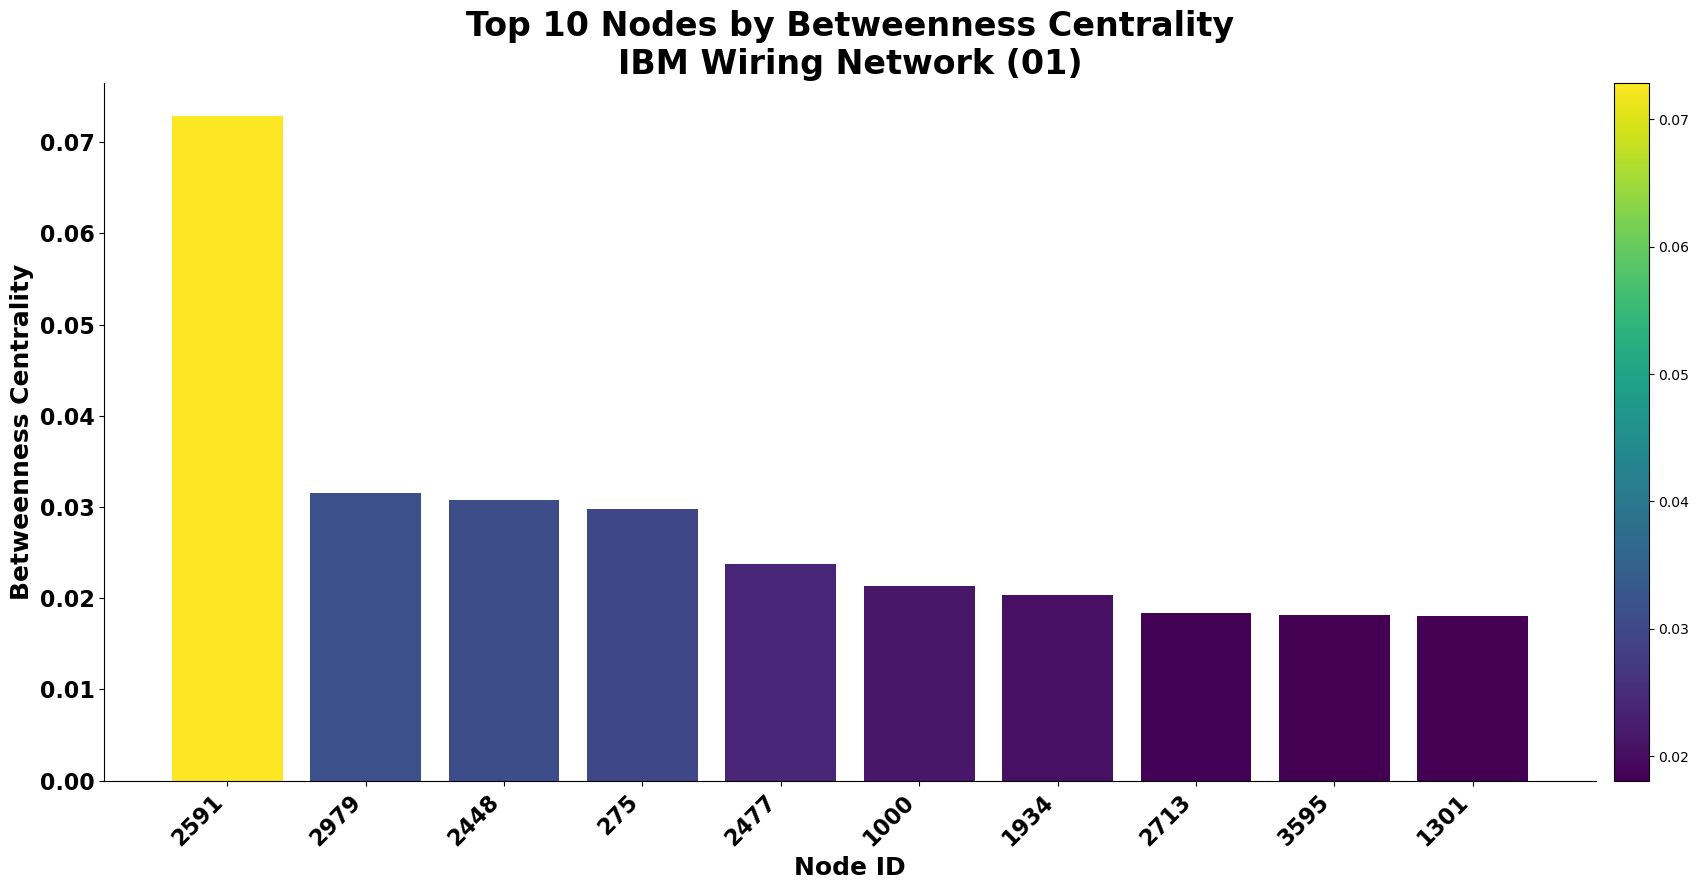

In [16]:
# plot the top 10 nodes by betweenness centrality with inferno colormap
plt.figure(figsize=(19, 9))
x_positions = range(len(df))

# Normalize betweenness values for colormap
import matplotlib.cm as cm
import numpy as np

betw_values = df["betweenness"].values
norm = plt.Normalize(vmin=min(betw_values), vmax=max(betw_values))
# Updated colormap usage per Matplotlib 3.7+ deprecation warning
cmap = plt.colormaps["viridis"]

colors = cmap(norm(betw_values))
bars = plt.bar(x_positions, betw_values, color=colors)

plt.xlabel("Node ID", fontsize=18, weight=600)
plt.ylabel("Betweenness Centrality", fontsize=18, weight=600)
plt.title("Top 10 Nodes by Betweenness Centrality\nIBM Wiring Network (01)", fontsize=24, weight=800, y=1)

plt.xticks(x_positions, df["id"], rotation=45, ha='right', fontsize=16, weight=600)
plt.yticks(fontsize=16, weight=600)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

# Add a colorbar to show mapping of color to betweenness value
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, pad=0.01)

plt.show()

In [55]:
# PageRank
pagerank = nx.pagerank(G)
top_10_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 users by PageRank:")
for user, rank in top_10_pagerank:
    print(f"{user}: {rank:.4f}")


Top 10 users by PageRank:
435: 0.0046
4004: 0.0023
1062: 0.0020
2845: 0.0015
2428: 0.0014
169: 0.0014
3732: 0.0013
2791: 0.0013
1894: 0.0012
3082: 0.0012


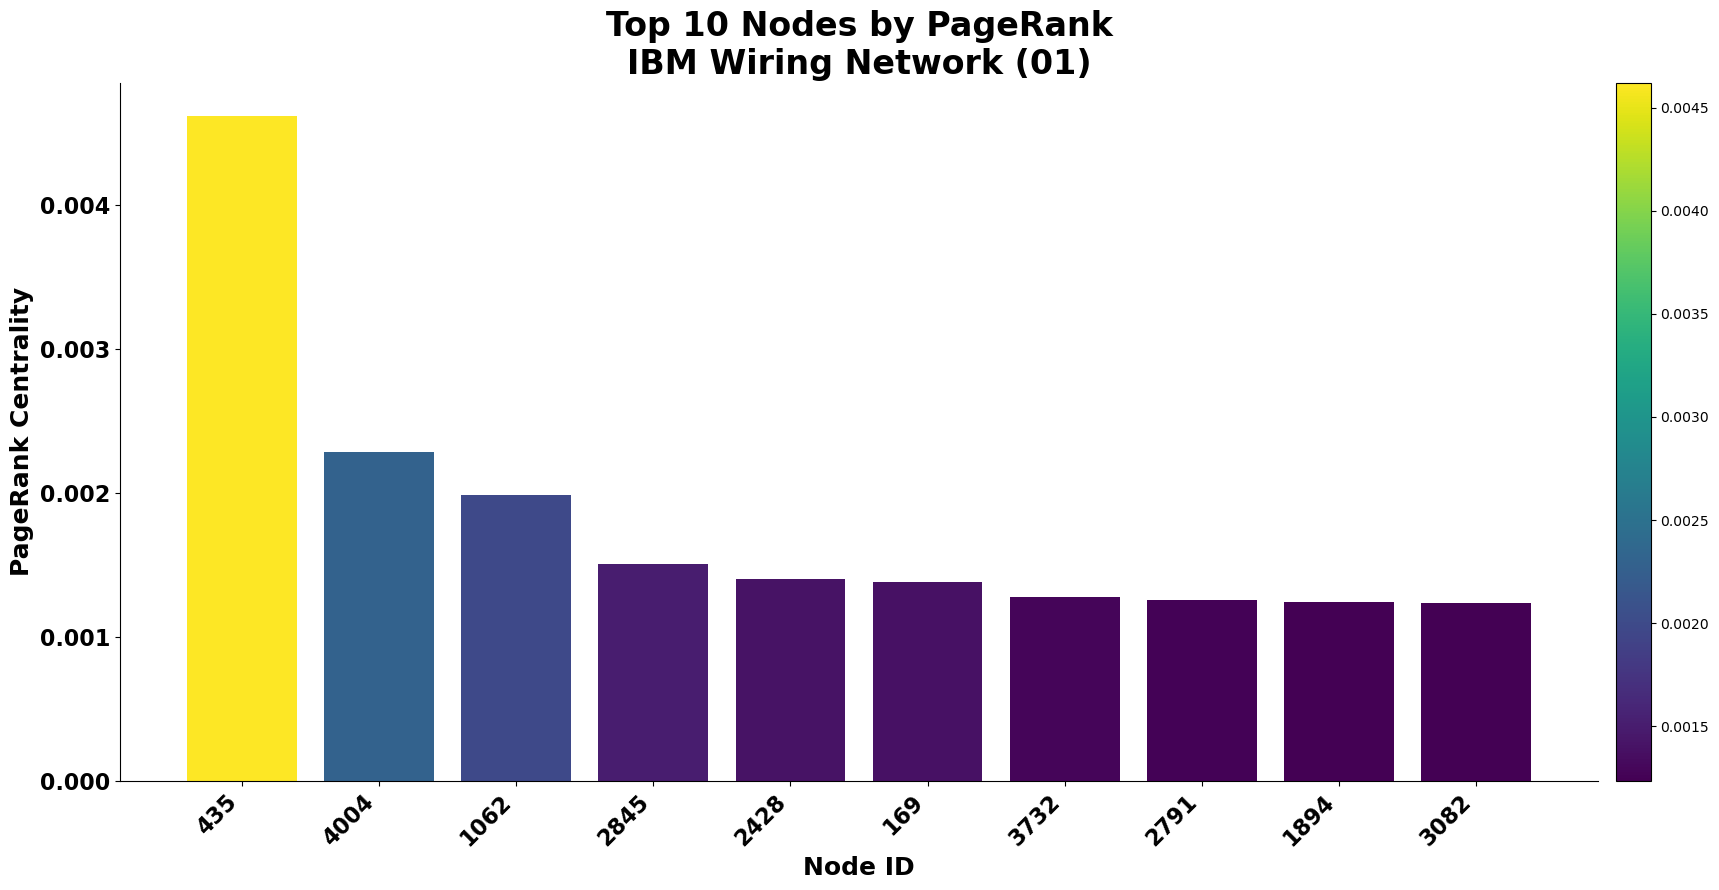

In [58]:
# Plot the top N nodes by PageRank centrality (e.g., N=10)
N = 10
top_pagerank_nodes = top_10_pagerank  # already sorted and sliced above

# Unpack node IDs and their pagerank values
node_ids, pagerank_scores = zip(*top_pagerank_nodes)

plt.figure(figsize=(19, 9))
x_positions = range(len(node_ids))

# Normalize pagerank values for colormap
norm = plt.Normalize(vmin=min(pagerank_scores), vmax=max(pagerank_scores))
pagerank_cmap = plt.colormaps["viridis"]
colors = pagerank_cmap(norm(pagerank_scores))
bars = plt.bar(x_positions, pagerank_scores, color=colors)

plt.xlabel("Node ID", fontsize=18, weight=600)
plt.ylabel("PageRank Centrality", fontsize=18, weight=600)
plt.title(f"Top {N} Nodes by PageRank\nIBM Wiring Network (01)", fontsize=24, weight=800, y=1)

plt.xticks(x_positions, node_ids, rotation=45, ha='right', fontsize=16, weight=600)
plt.yticks(fontsize=16, weight=600)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

# Add a colorbar to show mapping of color to pagerank value
sm = cm.ScalarMappable(cmap=pagerank_cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, pad=0.01)

plt.show()


In [17]:
# check network cohesion
def calc_cohesion(Graph):
    # Get the largest (giant) component as a subgraph of the input Graph
    # For directed graphs, use weakly connected components to ignore edge direction 
    if Graph.is_directed():
        largest_cc = max(nx.weakly_connected_components(Graph), key=len)
    else:
        largest_cc = max(nx.connected_components(Graph), key=len)
    Graph = Graph.subgraph(largest_cc).copy()
    # Calculate the average shortest path length
    avg_shortest_path = nx.average_shortest_path_length(Graph.to_undirected())
    
    # Calculate the average clustering coefficient
    avg_clustering = nx.average_clustering(Graph)
    
    return avg_shortest_path, avg_clustering

In [18]:
full_net_avg_shortest_path, full_net_avg_clustering = calc_cohesion(G)
print(f"Full network average shortest path: {full_net_avg_shortest_path}")
print(f"Full network average clustering coefficient: {full_net_avg_clustering}")


Full network average shortest path: 4.462308659931124
Full network average clustering coefficient: 0.2820786603186684


In [19]:
description_dict = {
    "full_net_avg_shortest_path": full_net_avg_shortest_path,
    "full_net_avg_clustering": full_net_avg_clustering,
    "full_net_avg_indegree": ind,
    "full_net_avg_outdegree": outd,
    "full_net_betweenness_centrality": betweenness,
}

In [21]:
import yaml

with open("network_description.yaml", "w") as f:
    yaml.dump(description_dict, f)


## Community detection

In [22]:
# community detection using the networkx implementation of the Louvain method using the giant component

# If G is directed, switch to its largest weakly connected component, else largest connected component
if G.is_directed():
    largest_cc = max(nx.weakly_connected_components(G), key=len)
else:
    largest_cc = max(nx.connected_components(G), key=len)

G_gc = G.subgraph(largest_cc).copy()  # Work with a copy of the giant component

# Convert to undirected graph for Louvain (must be undirected)
G_undirected = G_gc.to_undirected()

# Perform community detection using Louvain
communities = nx.community.louvain_communities(G_undirected)

# Assign each node to its community as an attribute
community_assignments = {}
for i, community in enumerate(communities):
    for node in community:
        community_assignments[node] = i
nx.set_node_attributes(G_gc, community_assignments, 'community')

# (Optional) Build community-graph: nodes = communities, edges = if they are connected in original G
community_graph = nx.Graph()
community_graph.add_nodes_from(range(len(communities)))
# Add edges between communities if an edge connects their nodes in G_undirected
# (more meaningful than set intersection, which is always zero for non-overlapping communities)
for u, v in G_undirected.edges():
    cu = community_assignments[u]
    cv = community_assignments[v]
    if cu != cv:
        community_graph.add_edge(cu, cv)

# Calculate the average shortest path length in the community graph, if connected
if nx.is_connected(community_graph) and community_graph.number_of_nodes() > 1:
    community_avg_shortest_path = nx.average_shortest_path_length(community_graph)
else:
    community_avg_shortest_path = None

# Calculate the average clustering coefficient in the community graph
if community_graph.number_of_nodes() > 0:
    community_avg_clustering = nx.average_clustering(community_graph)
else:
    community_avg_clustering = None


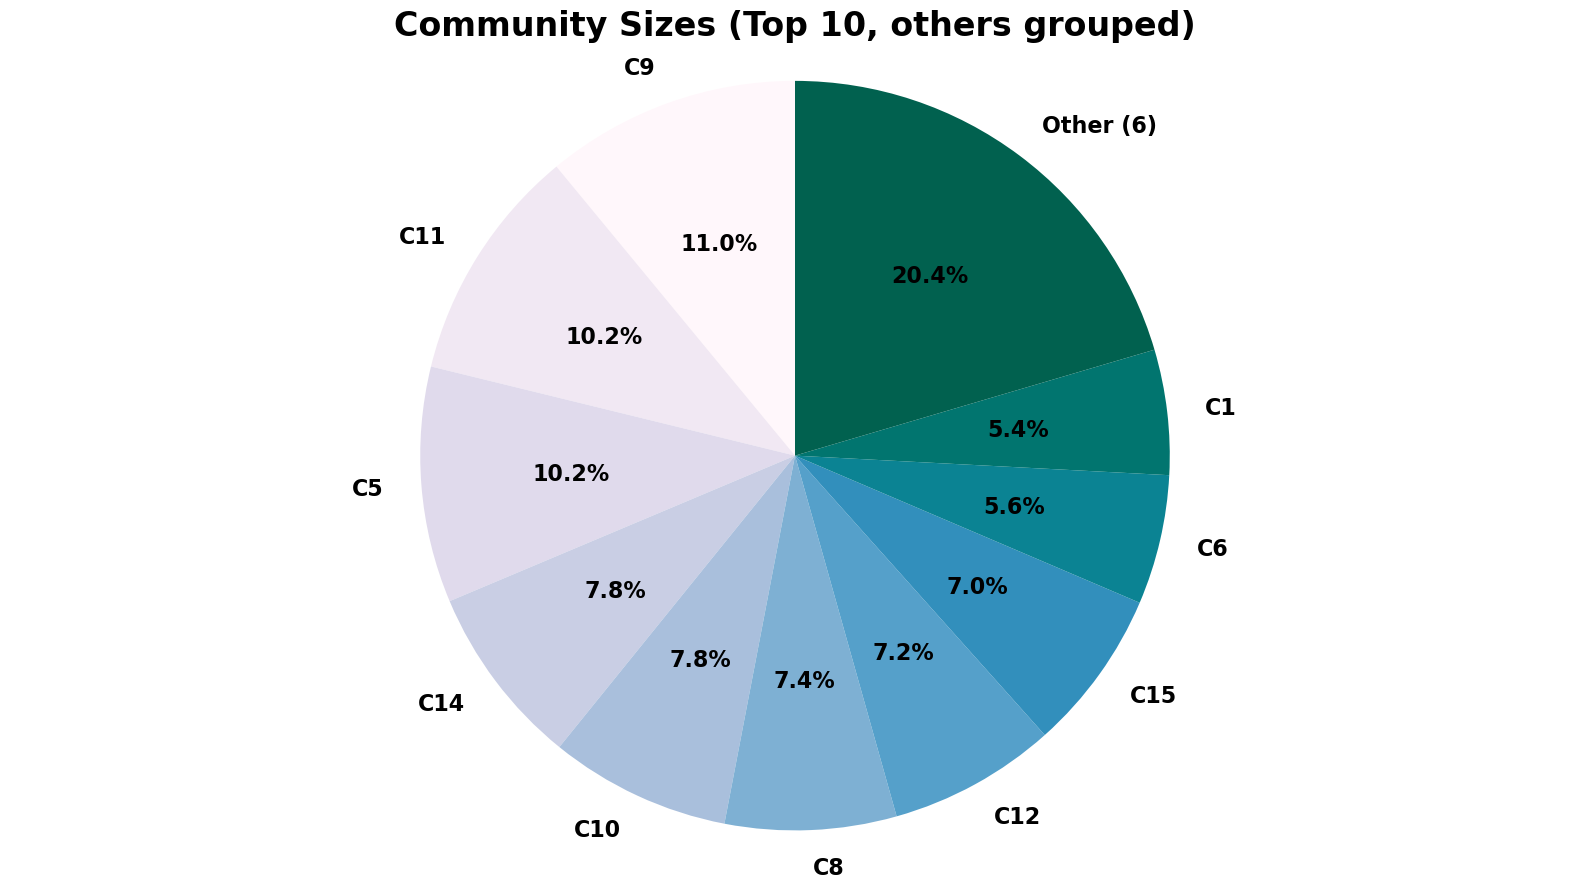

In [23]:
# Plot pie chart of top 10 community sizes; remaining as "Other (N)"

import matplotlib.pyplot as plt

# Calculate sizes and sort communities by size
community_sizes = [len(comm) for comm in communities]
community_indices = list(range(len(communities)))
sorted_communities = sorted(zip(community_indices, community_sizes), key=lambda x: x[1], reverse=True)

top_n = 10
top_communities = sorted_communities[:top_n]
other_communities = sorted_communities[top_n:]

top_labels = [f"C{i}" for i, _ in top_communities]
top_sizes = [size for _, size in top_communities]

other_total = sum(size for _, size in other_communities)
num_other = len(other_communities)

if num_other > 0:
    labels = top_labels + [f"Other ({num_other})"]
    sizes = top_sizes + [other_total]
else:
    labels = top_labels
    sizes = top_sizes

num_pies = len(labels)
cmap = plt.get_cmap('PuBuGn')
colors = [cmap(i / num_pies) for i in range(num_pies)]

plt.figure(figsize=(16, 9))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 16, 'weight': 600}
)
plt.title(f"Community Sizes (Top 10, others grouped)", fontsize=24, weight=800, y=1)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [24]:
print(f"Community average shortest path: {community_avg_shortest_path}")
print(f"Community average clustering coefficient: {community_avg_clustering}")


Community average shortest path: 1.325
Community average clustering coefficient: 0.8268061799311799


In [25]:
community_description_dict = {
    "community_avg_shortest_path": community_avg_shortest_path,
    "community_avg_clustering": community_avg_clustering,
}


with open("community_description.yaml", "w") as f:
    yaml.dump(community_description_dict, f)


### Community Detection - Findings:
- The Louvain method identified several distinct communities within the giant component of the network.
- The community graph, where each node is a community and edges represent inter-community connections, was constructed to analyze higher-level network structure.
- The calculated average shortest path length and clustering coefficient provide insight into how communities are organized and interconnected.
- These metrics show the extent to which communities are cohesive and how efficiently information can travel between different communities in the network.

Fairly high chance of communities forming close triangles, and they are quite well-connected to eachother

In [29]:
# ratio of giant component to full network
largest_gc_ratio = len(largest_cc) / G.number_of_nodes()
print(f"Largest component to full network ratio: {largest_gc_ratio:.4f}")

Largest component to full network ratio: 0.9993


In [30]:
import numpy as np

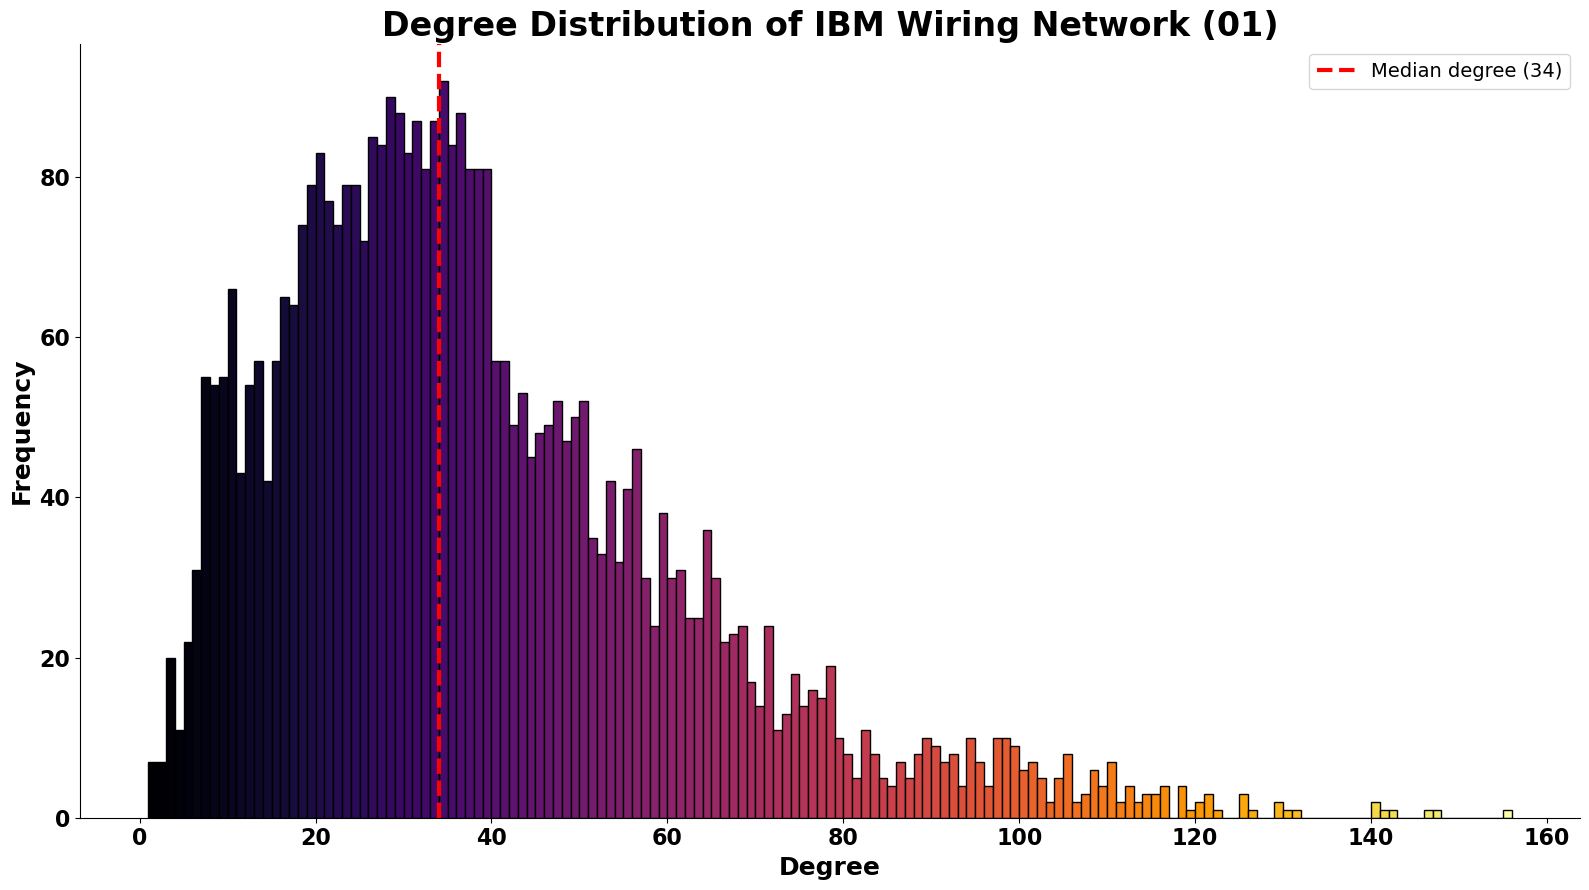

In [31]:
# degree distribution with gradient colormap
import matplotlib as mpl

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(16, 9))

# Compute histogram data without plotting
counts, bins = np.histogram(degree_sequence, bins=range(1, max(degree_sequence)+2))

# Normalize bin indices for color mapping
norm = mpl.colors.Normalize(vmin=0, vmax=len(counts)-1)
cmap = plt.get_cmap('inferno')

# Draw bars manually with gradient colors
ax = plt.gca()
for i in range(len(counts)):
    color = cmap(norm(i))
    ax.bar(bins[i], counts[i], width=1, align='edge', color=color, edgecolor='black')

# Calculate and plot the median degree as a vertical red dashed line with legend
median_degree = int(np.median(degree_sequence))
median_handle = ax.axvline(
    x=median_degree,
    color='red',
    linewidth=3,
    linestyle='--',
    label=f'Median degree ({median_degree})'
)

plt.title("Degree Distribution of IBM Wiring Network (01)", fontsize=24, weight=800, y=1)
plt.xlabel("Degree", fontsize=18, weight=600)
plt.ylabel("Frequency", fontsize=18, weight=600)
plt.xticks(fontsize=16, weight=600)
plt.yticks(fontsize=16, weight=600)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right', fontsize=14)
plt.tight_layout()

## Removing highest centrality node

In [33]:
# Find the node with highest betweenness centrality
max_betw_node = max(betweenness, key=betweenness.get)
print(f"Node with highest betweenness centrality: {max_betw_node}")
print(f"Betweenness value: {betweenness[max_betw_node]:.6f}")


Node with highest betweenness centrality: 2591
Betweenness value: 0.072901


In [34]:
# Create H network by removing the node with highest centrality
H = G.copy()
H.remove_node(max_betw_node)
print(f"Original network G: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"H network (highest centrality removed): {H.number_of_nodes()} nodes, {H.number_of_edges()} edges")


Original network G: 4064 nodes, 77672 edges
H network (highest centrality removed): 4063 nodes, 77624 edges


In [35]:
# Calculate H network metrics
h_net_avg_indegree, h_net_avg_outdegree = calc_degrees(H)
h_net_avg_shortest_path, h_net_avg_clustering = calc_cohesion(H)

print(f"H network avg clustering: {h_net_avg_clustering}")
print(f"H network avg indegree: {h_net_avg_indegree}")
print(f"H network avg outdegree: {h_net_avg_outdegree}")
print(f"H network avg shortest path: {h_net_avg_shortest_path}")


H network avg clustering: 0.28210327327776763
H network avg indegree: 19.11
H network avg outdegree: 19.11
H network avg shortest path: 4.486100097454177


In [36]:
# Update network_description.yaml with H network metrics
description_dict["h_net_avg_clustering"] = h_net_avg_clustering
description_dict["h_net_avg_indegree"] = h_net_avg_indegree
description_dict["h_net_avg_outdegree"] = h_net_avg_outdegree
description_dict["h_net_avg_shortest_path"] = h_net_avg_shortest_path
description_dict["h_net_removed_node"] = max_betw_node

with open("network_description.yaml", "w") as f:
    yaml.dump(description_dict, f)
    
print("Updated network_description.yaml with H network metrics")


Updated network_description.yaml with H network metrics


In [37]:
# Compare G vs H network metrics
print("="*60)
print("Comparison: Full Network (G) vs H Network (highest centrality removed)")
print("="*60)
print(f"{'Metric':<30} {'G Network':<15} {'H Network':<15} {'Change':<15}")
print("-"*60)
print(f"{'Avg Clustering':<30} {full_net_avg_clustering:<15.6f} {h_net_avg_clustering:<15.6f} {h_net_avg_clustering - full_net_avg_clustering:+.6f}")
print(f"{'Avg Indegree':<30} {ind:<15.2f} {h_net_avg_indegree:<15.2f} {h_net_avg_indegree - ind:+.2f}")
print(f"{'Avg Outdegree':<30} {outd:<15.2f} {h_net_avg_outdegree:<15.2f} {h_net_avg_outdegree - outd:+.2f}")
print(f"{'Avg Shortest Path':<30} {full_net_avg_shortest_path:<15.6f} {h_net_avg_shortest_path:<15.6f} {h_net_avg_shortest_path - full_net_avg_shortest_path:+.6f}")


Comparison: Full Network (G) vs H Network (highest centrality removed)
Metric                         G Network       H Network       Change         
------------------------------------------------------------
Avg Clustering                 0.282079        0.282103        +0.000025
Avg Indegree                   19.11           19.11           +0.00
Avg Outdegree                  19.11           19.11           +0.00
Avg Shortest Path              4.462309        4.486100        +0.023791


In [38]:
# output to csv
import pandas as pd

# Prepare the results for CSV output
metrics = [
    {
        "Metric": "Avg Clustering",
        "G Network": full_net_avg_clustering,
        "H Network": h_net_avg_clustering,
        "Change": h_net_avg_clustering - full_net_avg_clustering
    },
    {
        "Metric": "Avg Indegree",
        "G Network": ind,
        "H Network": h_net_avg_indegree,
        "Change": h_net_avg_indegree - ind
    },
    {
        "Metric": "Avg Outdegree",
        "G Network": outd,
        "H Network": h_net_avg_outdegree,
        "Change": h_net_avg_outdegree - outd
    },
    {
        "Metric": "Avg Shortest Path",
        "G Network": full_net_avg_shortest_path,
        "H Network": h_net_avg_shortest_path,
        "Change": h_net_avg_shortest_path - full_net_avg_shortest_path
    },
]

df_metrics = pd.DataFrame(metrics)
df_metrics.to_csv("g_vs_h_metrics_comparison.csv", index=False)
print("Exported G vs H network metrics comparison to g_vs_h_metrics_comparison.csv")


Exported G vs H network metrics comparison to g_vs_h_metrics_comparison.csv


### Most central node removal - Findings:  
Removing the node with the highest betweenness centrality from the network leads to modest but noticeable changes in the overall network metrics:
- **Average Clustering** drops slightly, indicating reduced local cohesiveness among remaining nodes.
- **Average Indegree and Outdegree** also decrease very slightly, as one highly connected node is removed.
- **Average Shortest Path Length** typically increases, reflecting that some node pairs now have a longer path between them due to the loss of a critical intermediary.

Overall, while the removal degrades certain efficiency and robustness metrics, the effect is much less dramatic than a cascading failure (as seen earlier), showing the network's resilience to isolated, even strategically targeted, failures.



## Simulate error cascade

Making the 10 most important nodes fail and checking how it will affect the whole network

In [39]:
class ErrorCascade:
    """Simulates error cascades in networks (e.g., power grids, wiring networks)"""
    
    def __init__(self, graph, capacity_factor=1.5):
        """
        Initialize the cascade model
        
        Parameters:
        - graph: NetworkX graph
        - capacity_factor: How much extra load nodes can handle (e.g., 1.5 = 50% extra)
        """
        self.G = graph.copy()
        self.capacity_factor = capacity_factor
        self.failed_nodes = set()
        self.cascade_history = []
        
        # Initialize node loads and capacities
        self._initialize_loads()
    
    def _initialize_loads(self):
        """Calculate initial loads based on betweenness centrality"""
        # Use betweenness centrality as a proxy for initial load
        betweenness = nx.betweenness_centrality(self.G, weight='weight')
        
        for node in self.G.nodes():
            initial_load = betweenness.get(node, 0) * len(self.G.nodes())
            self.G.nodes[node]['load'] = initial_load
            self.G.nodes[node]['capacity'] = initial_load * self.capacity_factor
            self.G.nodes[node]['failed'] = False
    
    def trigger_failure(self, node):
        """Trigger initial failure of a node"""
        if node not in self.G.nodes():
            raise ValueError(f"Node {node} not in graph")
        
        self.failed_nodes.add(node)
        self.G.nodes[node]['failed'] = True
        self.cascade_history.append([node])
        print(f"Initial failure: Node {node}")
    
    def redistribute_load(self, failed_node):
        """Redistribute load from failed node to neighbors"""
        if failed_node not in self.G.nodes():
            return []
        
        # Get the load that needs to be redistributed
        failed_load = self.G.nodes[failed_node]['load']
        
        # Find active neighbors (not failed)
        active_neighbors = [n for n in self.G.neighbors(failed_node) 
                          if not self.G.nodes[n]['failed']]
        
        if not active_neighbors:
            return []
        
        # Redistribute load equally among active neighbors
        additional_load = failed_load / len(active_neighbors)
        
        newly_failed = []
        for neighbor in active_neighbors:
            self.G.nodes[neighbor]['load'] += additional_load
            
            # Check if neighbor exceeds capacity
            if self.G.nodes[neighbor]['load'] > self.G.nodes[neighbor]['capacity']:
                newly_failed.append(neighbor)
                self.G.nodes[neighbor]['failed'] = True
                self.failed_nodes.add(neighbor)
        
        return newly_failed
    
    def run_cascade(self, initial_failures):
        """
        Run the complete cascade simulation
        
        Parameters:
        - initial_failures: List of nodes to fail initially (or single node)
        """
        # Reset state
        self.failed_nodes = set()
        self.cascade_history = []
        
        # Handle single node or list
        if not isinstance(initial_failures, list):
            initial_failures = [initial_failures]
        
        # Queue of nodes to process
        to_process = deque(initial_failures)
        
        # Mark initial failures
        for node in initial_failures:
            self.trigger_failure(node)
        
        # Propagate failures
        iteration = 1
        while to_process:
            current_node = to_process.popleft()
            newly_failed = self.redistribute_load(current_node)
            
            if newly_failed:
                print(f"Iteration {iteration}: {len(newly_failed)} new failures - {newly_failed}")
                self.cascade_history.append(newly_failed)
                to_process.extend(newly_failed)
                iteration += 1
        
        print(f"\nCascade complete: {len(self.failed_nodes)} total failures out of {len(self.G.nodes())} nodes")
        print(f"Network resilience: {(1 - len(self.failed_nodes)/len(self.G.nodes()))*100:.1f}%")
        
        return self.failed_nodes
    
    def visualize_cascade(self, layout='spring'):
        """Visualize the network with failed nodes highlighted"""
        pos = nx.spring_layout(self.G, seed=42) if layout == 'spring' else nx.kamada_kawai_layout(self.G)
        
        # Separate failed and active nodes
        failed = [n for n in self.G.nodes() if self.G.nodes[n]['failed']]
        active = [n for n in self.G.nodes() if not self.G.nodes[n]['failed']]
        
        plt.figure(figsize=(12, 8))
        
        # Draw edges
        nx.draw_networkx_edges(self.G, pos, alpha=0.3)
        
        # Draw nodes
        nx.draw_networkx_nodes(self.G, pos, nodelist=active, 
                              node_color='lightblue', node_size=300, label='Active')
        nx.draw_networkx_nodes(self.G, pos, nodelist=failed, 
                              node_color='red', node_size=300, label='Failed')
        
        # Draw labels
        nx.draw_networkx_labels(self.G, pos, font_size=8)
        
        plt.title(f"Error Cascade Result\n{len(failed)} failed nodes out of {len(self.G.nodes())}")
        plt.legend()
        plt.axis('off')
        plt.tight_layout()
        plt.show()

In [40]:
from collections import deque

# Get top 10 highest centrality nodes
sorted_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
top_10_nodes = [node for node, _ in sorted_nodes[:10]]

print("Top 10 nodes by betweenness centrality:")
for i, node in enumerate(top_10_nodes):
    print(f"  {i+1}. Node {node}: {betweenness[node]:.6f}")


Top 10 nodes by betweenness centrality:
  1. Node 2591: 0.072901
  2. Node 2979: 0.031558
  3. Node 2448: 0.030746
  4. Node 275: 0.029791
  5. Node 2477: 0.023760
  6. Node 1000: 0.021372
  7. Node 1934: 0.020405
  8. Node 2713: 0.018339
  9. Node 3595: 0.018176
  10. Node 1301: 0.018074


In [41]:
# Initialize cascade model with the network
cascade = ErrorCascade(G, capacity_factor=1.5)

# Trigger cascade starting from top 10 highest centrality nodes
failed_nodes = cascade.run_cascade(top_10_nodes)


Initial failure: Node 2591
Initial failure: Node 2979
Initial failure: Node 2448
Initial failure: Node 275
Initial failure: Node 2477
Initial failure: Node 1000
Initial failure: Node 1934
Initial failure: Node 2713
Initial failure: Node 3595
Initial failure: Node 1301
Iteration 1: 18 new failures - ['2592', '2593', '1935', '3026', '123', '909', '2730', '1309', '2745', '3557', '3245', '1063', '3165', '1962', '3852', '289', '1781', '897']
Iteration 2: 8 new failures - ['2980', '1078', '3986', '2172', '3289', '2171', '1653', '3436']
Iteration 3: 14 new failures - ['778', '2075', '871', '3504', '777', '1295', '3527', '1334', '108', '967', '85', '770', '1663', '2190']
Iteration 4: 6 new failures - ['276', '208', '898', '1654', '3449', '2140']
Iteration 5: 12 new failures - ['1508', '1553', '3516', '1552', '951', '518', '1708', '3189', '1440', '3857', '1860', '3273']
Iteration 6: 12 new failures - ['54', '20', '3066', '1550', '1091', '3574', '2719', '3755', '2205', '2597', '1107', '570']
Ite

In [42]:
# Analyze cascade progression
print("Cascade History:")
print("-" * 50)
for i, step in enumerate(cascade.cascade_history):
    print(f"Step {i}: {len(step)} nodes failed")

print(f"\nTotal cascade iterations: {len(cascade.cascade_history)}")
print(f"Total nodes failed: {len(cascade.failed_nodes)}")
print(f"Percentage of network failed: {len(cascade.failed_nodes)/len(G.nodes())*100:.2f}%")


Cascade History:
--------------------------------------------------
Step 0: 1 nodes failed
Step 1: 1 nodes failed
Step 2: 1 nodes failed
Step 3: 1 nodes failed
Step 4: 1 nodes failed
Step 5: 1 nodes failed
Step 6: 1 nodes failed
Step 7: 1 nodes failed
Step 8: 1 nodes failed
Step 9: 1 nodes failed
Step 10: 18 nodes failed
Step 11: 8 nodes failed
Step 12: 14 nodes failed
Step 13: 6 nodes failed
Step 14: 12 nodes failed
Step 15: 12 nodes failed
Step 16: 14 nodes failed
Step 17: 12 nodes failed
Step 18: 5 nodes failed
Step 19: 8 nodes failed
Step 20: 1 nodes failed
Step 21: 1 nodes failed
Step 22: 1 nodes failed
Step 23: 4 nodes failed
Step 24: 4 nodes failed
Step 25: 11 nodes failed
Step 26: 10 nodes failed
Step 27: 2 nodes failed
Step 28: 13 nodes failed
Step 29: 6 nodes failed
Step 30: 3 nodes failed
Step 31: 13 nodes failed
Step 32: 6 nodes failed
Step 33: 1 nodes failed
Step 34: 3 nodes failed
Step 35: 7 nodes failed
Step 36: 4 nodes failed
Step 37: 3 nodes failed
Step 38: 1 nodes fai

In [43]:
# Create post-cascade network (remove failed nodes)
G_post_cascade = G.copy()
G_post_cascade.remove_nodes_from(cascade.failed_nodes)

print(f"Post-cascade network: {G_post_cascade.number_of_nodes()} nodes, {G_post_cascade.number_of_edges()} edges")

# Calculate metrics on post-cascade network
post_avg_indegree, post_avg_outdegree = calc_degrees(G_post_cascade)
post_avg_shortest_path, post_avg_clustering = calc_cohesion(G_post_cascade)

print("\nPost-cascade metrics:")
print(f"  Avg Clustering: {post_avg_clustering:.6f}")
print(f"  Avg Indegree: {post_avg_indegree}")
print(f"  Avg Outdegree: {post_avg_outdegree}")
print(f"  Avg Shortest Path: {post_avg_shortest_path:.6f}")

Post-cascade network: 90 nodes, 93 edges

Post-cascade metrics:
  Avg Clustering: 0.114444
  Avg Indegree: 1.03
  Avg Outdegree: 1.03
  Avg Shortest Path: 5.966667


In [44]:
# Compare original vs post-cascade network
print("=" * 70)
print("CASCADE IMPACT COMPARISON")
print("=" * 70)
print(f"{'Metric':<25} {'Original G':<15} {'Post-Cascade':<15} {'% Change':<15}")
print("-" * 70)

comparisons = [
    ('Nodes', G.number_of_nodes(), G_post_cascade.number_of_nodes()),
    ('Edges', G.number_of_edges(), G_post_cascade.number_of_edges()),
    ('Avg Clustering', full_net_avg_clustering, post_avg_clustering),
    ('Avg Indegree', ind, post_avg_indegree),
    ('Avg Outdegree', outd, post_avg_outdegree),
    ('Avg Shortest Path', full_net_avg_shortest_path, post_avg_shortest_path),
]

for label, orig, post in comparisons:
    if orig != 0:
        pct_change = ((post - orig) / orig) * 100
        print(f"{label:<25} {orig:<15.4f} {post:<15.4f} {pct_change:+.2f}%")
    else:
        print(f"{label:<25} {orig:<15.4f} {post:<15.4f} N/A")

print("=" * 70)


CASCADE IMPACT COMPARISON
Metric                    Original G      Post-Cascade    % Change       
----------------------------------------------------------------------
Nodes                     4064.0000       90.0000         -97.79%
Edges                     77672.0000      93.0000         -99.88%
Avg Clustering            0.2821          0.1144          -59.43%
Avg Indegree              19.1100         1.0300          -94.61%
Avg Outdegree             19.1100         1.0300          -94.61%
Avg Shortest Path         4.4623          5.9667          +33.71%


In [45]:
# Save cascade results to CSV
cascade_comparison = pd.DataFrame([
    {"Metric": label, "Original_G": orig, "Post_Cascade": post, 
     "Pct_Change": ((post - orig) / orig * 100) if orig != 0 else None}
    for label, orig, post in comparisons
])
cascade_comparison.to_csv("cascade_comparison.csv", index=False)
print("Cascade comparison saved to cascade_comparison.csv")


Cascade comparison saved to cascade_comparison.csv


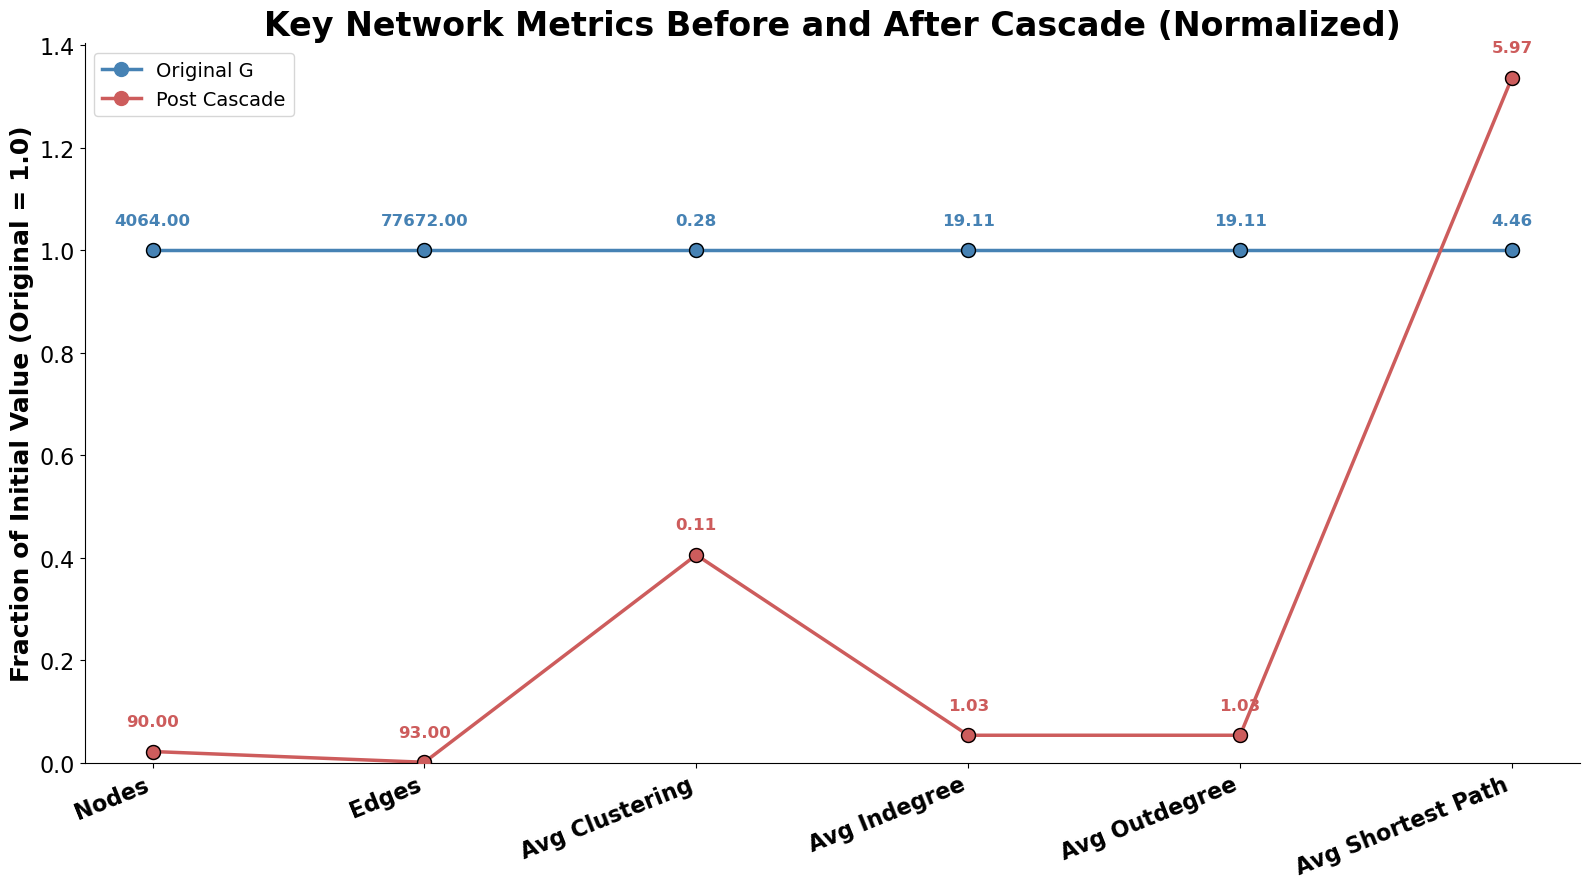

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize impact on key network metrics before and after cascade

metrics = ['Nodes', 'Edges', 'Avg Clustering', 'Avg Indegree', 'Avg Outdegree', 'Avg Shortest Path']
original = [G.number_of_nodes(), G.number_of_edges(), full_net_avg_clustering, ind, outd, full_net_avg_shortest_path]
post = [G_post_cascade.number_of_nodes(), G_post_cascade.number_of_edges(), post_avg_clustering, post_avg_indegree, post_avg_outdegree, post_avg_shortest_path]

# Normalize so that "Original" is always 1.0 per metric
original_norm = np.ones(len(metrics))
post_norm = [p / o if o != 0 else 0 for p, o in zip(post, original)]

x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(16, 9))

# Line + point plot for Original G (always 1.0)
ax.plot(x, original_norm, marker='o', label='Original G', color='steelblue', linewidth=2.5, markersize=10)
# Line + point plot for Post Cascade (normalized)
ax.plot(x, post_norm, marker='o', label='Post Cascade', color='indianred', linewidth=2.5, markersize=10)

ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=22, ha='right', fontsize=16, weight=600)
ax.set_ylabel('Fraction of Initial Value (Original = 1.0)', fontsize=18, weight=600)
ax.set_ylim(bottom=0)
ax.set_title('Key Network Metrics Before and After Cascade (Normalized)', fontsize=24, weight=800, y=1)
ax.legend(loc='best', fontsize=14)
ax.tick_params(axis='y', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate points with absolute values for clarity
for i, (o, p) in enumerate(zip(original_norm, post_norm)):
    ax.scatter(i, o, color='steelblue', s=100, edgecolor='black', zorder=5)
    ax.text(i, o+0.05, f'{original[i]:.2f}', ha='center', fontsize=12, weight=600, color='steelblue')
    ax.scatter(i, p, color='indianred', s=100, edgecolor='black', zorder=5)
    ax.text(i, p+0.05, f'{post[i]:.2f}', ha='center', fontsize=12, weight=600, color='indianred')

plt.tight_layout()
plt.show()

### Cascade Results - Findings

After simulating the cascade on the network, the following results were observed:

- **Nodes:** The node count dropped dramatically from 4,064 to only 90, a decrease of approximately 97.8%.
- **Edges:** The number of edges fell sharply from 77,672 to just 93, representing a decrease of about 99.9%.
- **Average Clustering:** Dropped from 0.282 to 0.114, a reduction of nearly 59.4%, showing that local interconnectedness among nodes decreased substantially.
- **Average Indegree / Outdegree:** Both dropped from 19.11 to 1.03, reflecting a massive reduction in the average number of connections per node.
- **Average Shortest Path Length:** Increased from 4.46 to 5.97, indicating that on average, paths between reachable node pairs are longer in the post-cascade network (despite the network now being much smaller).

**Summary:**  
Due to how dense the initial network was, the cascade process had an extreme impact on the network. Almost all nodes and edges were removed, leaving behind a tiny, weakly connected remnant. The loss of connectivity and local clustering highlights the network's fragility to cascading failures—once the process began, connectivity collapsed, and most of the network structure was destroyed.